# Correction

Cette partie est assez libre comme vous l'avez vu, nous vous proposons donc une correction, mais elle est loin d'être la seule possible ! L'essentiel est que vous aillez pu explorer par vous-même, et que ces découvertes vous aient plues !

**Commencez par executez le programme ci-dessous, ou vous aurez des erreurs !**

In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import time

j=1j #pratique

plt.rcParams['figure.figsize'] = [14, 14] #Redimensionne l'affichage

def suite(zn,C):
    
    """
    Calcule le terme suivant d'une suite récurrente
    """
    
    return(zn**2+C)


def estDivergente(C, rang_max, Zzero=0):
    
    """
    La fonction indique si la suite issue du nombre complexe C est divergente (i.e. C n'appartient pas à l'ensemble que l'on calcule)
    'C' est le nombre complexe dont est issue la suite (i.e le complexe dont on veut savoir s'il appartient à l'ensemble)
    'rang_max' est le rang maximal pour lequel on détermine si la suite est bornée. Si |z|<2 à rang_max, on considère que la suite est bornée. 
    'Zzero' est un argument OPTIONNEL pour changer le 1er terme de la suite. Si rien n'est spécifié, Zzero=0.
    """
    
    z=Zzero
    for k in range(rang_max):
        z=suite(z,C)
        if np.abs(z)>2:
            return(True,k)
    return(False,0) # la suite n'est A PRIORI pas divergente
    

def couleur(rang_de_divergence, rang_max, mode_de_colorisation):
    
    """
    renvoie un triplet associée à une couleur suivant le type de la variable mode_de_colorisation.
    'rang_de_divergence' est le rang renvoyé par la fonction 'estDivergente()'
    rang_max est nécessaire car on veut savoir ou se situe rang_de_divergence entre 0 et rang_max
    mode_de_colorisation = 'lineaire', 'noir_et_blanc' ou 'log'
    """
    
    rang_de_divergence_normalise = rang_de_divergence * 2 / rang_max # désormais 0 < rang_de_divergence_normalise < 2 
    
    if mode_de_colorisation=="log":
        rang_de_divergence_normalise=math.sqrt(rang_de_divergence_normalise)*math.sqrt(2) #pourquoi calculer une racine carrée, alors que l'échelle de couleur est une échelle dite "logarithmique" ? Car la fonction puissance et le logarithme sont étroitements liés ; on a a^x=exp(x ln(a))
    elif mode_de_colorisation=="noir_et_blanc":
        return(1,1,1)
    
    #En python, au lieu d'utiliser la notation standard des couleurs (triplet d'entier entre 0 et 255, on peut utiliser un triplet de flottants compris entre 0 et 1, comme ici
    
    if rang_de_divergence_normalise<=1: 
        couleur_pixel=(0.0, rang_de_divergence_normalise, 1-rang_de_divergence_normalise) #renvoie une nuance de Vert et Bleu
    else:
        couleur_pixel=(rang_de_divergence_normalise-1,2-rang_de_divergence_normalise,0.0) #renvoie une nuance de Rouge et Vert
    
    return(couleur_pixel)

def afficheEtEnregistre(matrice, xmin, xmax, ymin, ymax, nom_de_fichier) :
    
    """
    permet d'afficher la matrice et de l'enregistrer sous le nom nom_de_fichier
    xmin, xmax, ymin, ymax sont des REELS correspondant aux limites des axes sur lesquels l'image correspondant à la matrice est affichée.
    nom_de_fichier doit être suivi de .png
    A noter, l'enregistrement d'images ne fonctionne pas en ligne, il faudrait copier coller ce programme dans un éditeur python sur votre ordinateur...
    """
    
    plt.imshow(matrice, extent = ([xmin, xmax, ymin, ymax]))
    #plt.savefig(nom_de_fichier)
    plt.show()



def main(xmin=-2, xmax=0.5, ymin=-1.1, ymax=1.1, rang_max=100,  nb_points_ligne=100, mode_de_colorisation="log", type_ensemble="mandelbrot", argument_julia=0.2+0.6j, nom_fichier="test"):
    
    """
    xmin, xmax, ymin, ymax = définit le rectangle du plan complexe dans lequel on fait les calculs
    'rang_max' est le rang maximal pour lequel on détermine si la suite est bornée. Si |z|<2 à rang_max, on considère que la suite est bornée. 
    nb_points_ligne = nombre de points calculés par ligne (qualité de l'image). Le nombre de ligne est calculé automatiquement à partir des autres arguments.
    mode_de_colorisation = 'log' 'linear'ou 'noir_et_blanc'
    type_ensemble = choisit le type d'ensemble que l'on veut calculer ('mandelbrot' ou 'julia')
    argument_julia = argument nécessaire que si on veut calculer l'ensemble de julia (c'est la constante C)
    TOUS LES ARGUMENTS SONT OPTIONNELS (ils ont une valeur par défaut)
    """
    
    plt.close() #Ferme les images précédentes si il y en avait
    pas=(xmax-xmin)/nb_points_ligne #pas entre 2 points calculés du plan complexe
    nb_lignes=int((ymax-ymin)/pas) #de cette manière, les pixels sont carrés


    print('nombre de points en abcisse : '+ str(nb_points_ligne))
    print('nombre de points en ordonnée : '+ str(nb_lignes))


    matriceCouleur=np.zeros([nb_lignes,nb_points_ligne,3], dtype=float)#on crée une matrice qui contient des triplets de flottants
    for x in range(nb_points_ligne):
        for y in range(nb_lignes):#double boucle pour parcourir le plan complexe
            xc=xmin+pas*x #coordonees du point que l'on teste actuellement
            yc=ymin+pas*y #coordonees du point que l'on teste actuellement
            
            if type_ensemble=="mandelbrot":
                divergente, rang_de_divergence = estDivergente(xc+yc*j, rang_max)
            elif type_ensemble=="julia":
                divergente, rang_de_divergence = estDivergente(argument_julia, rang_max, xc+yc*j)
                
            else :
                print("type_ensemble invalide ! Seuls 'julia' et 'mandelbrot' sont acceptes")
                return()
            
            #Colorisation
            
            if divergente==False:
                matriceCouleur[nb_lignes-y-1,x]=(0.,0.,0.)
                #les points qui appartiennent à l'ensemble sont coloriés en noir
            elif divergente==True:
                matriceCouleur[nb_lignes-y-1,x] = couleur(rang_de_divergence, rang_max, mode_de_colorisation)
                
    afficheEtEnregistre(matriceCouleur, xmin, xmax, ymin, ymax, nom_fichier)
    return()

Modifiez l’argument “nb_points_ligne” pour faire varier la qualité de l’image affichée. Attention, le temps de calcul dépend fortement de cet argument !

*On peut écrire par exemple main(nb_points_ligne=50) pour avoir une image de mauvaise qualité qui s'affiche rapidement, ou main(nb_points_ligne=500) pour avoir une image de bonne qualité mais l'ente à l'affichage*

nombre de points en abcisse : 50
nombre de points en ordonnée : 44


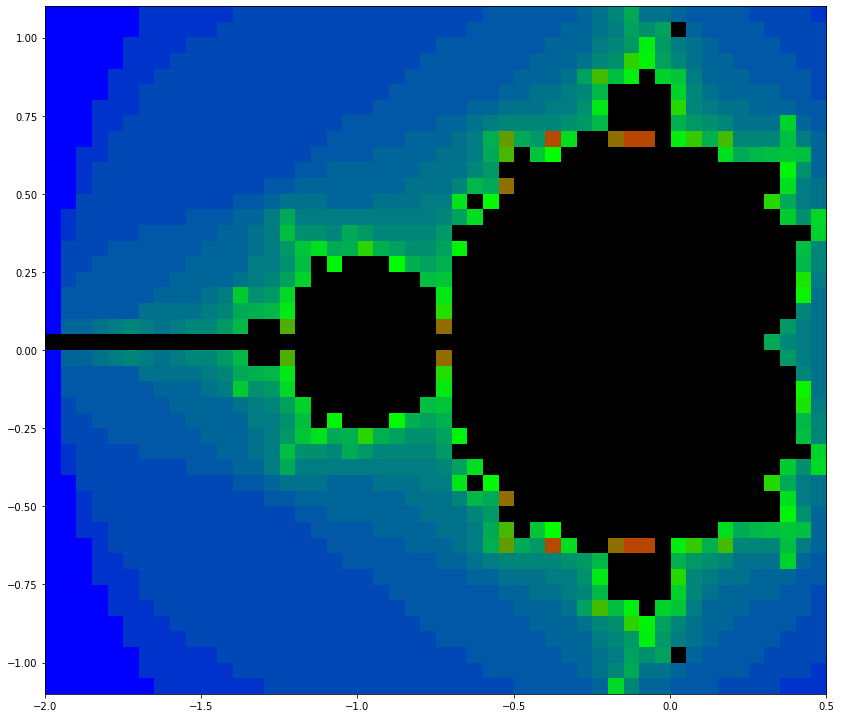

In [2]:
main(nb_points_ligne=50);

nombre de points en abcisse : 500
nombre de points en ordonnée : 440


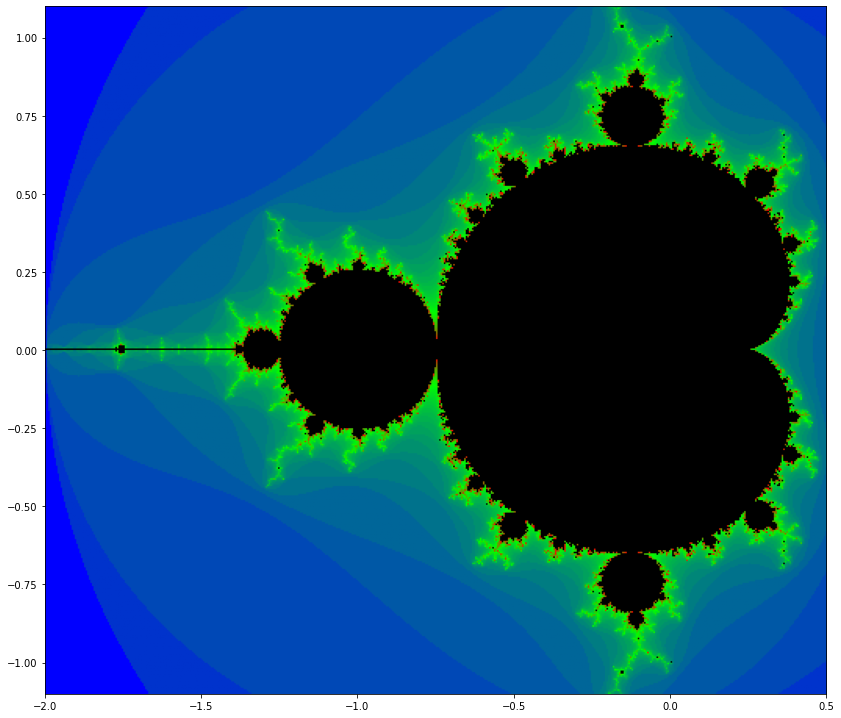

In [3]:
main(nb_points_ligne=500);

Modifiez l'argument "rang_max" pour faire varier le rang maximum à partir duquel la suite n'est pas considérée comme convergente.

*On constate que plus on baisse cet argument, plus l'ensemble est "lisse" : on perd la capacité à distinguer les cas proches de la frontière. Il faut donc augmenter cet argument lorsque l'on zoom fortement sur la frontière.*

nombre de points en abcisse : 400
nombre de points en ordonnée : 352


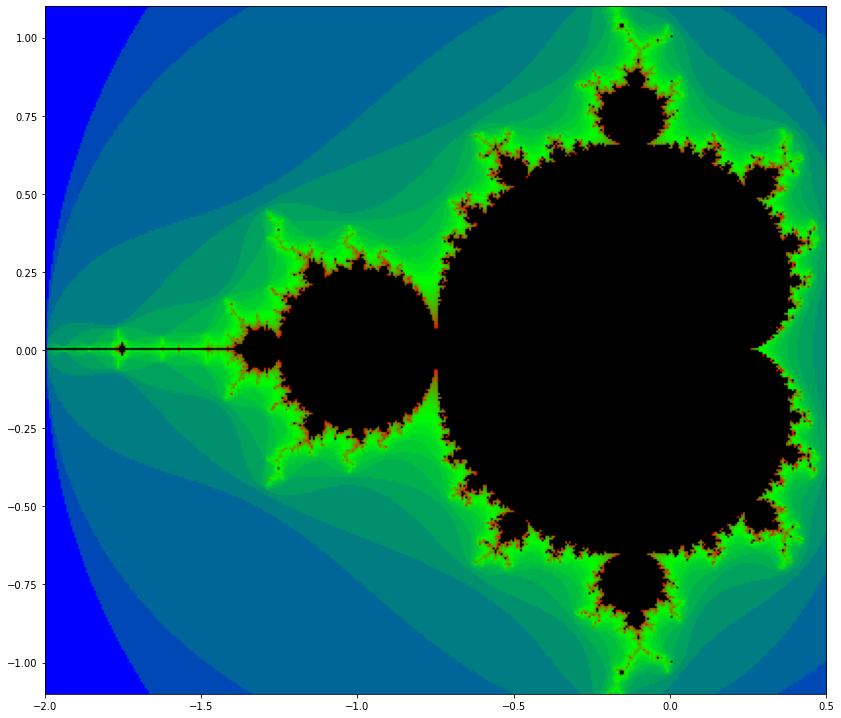

In [4]:
main(rang_max=50, nb_points_ligne=400);

nombre de points en abcisse : 400
nombre de points en ordonnée : 352


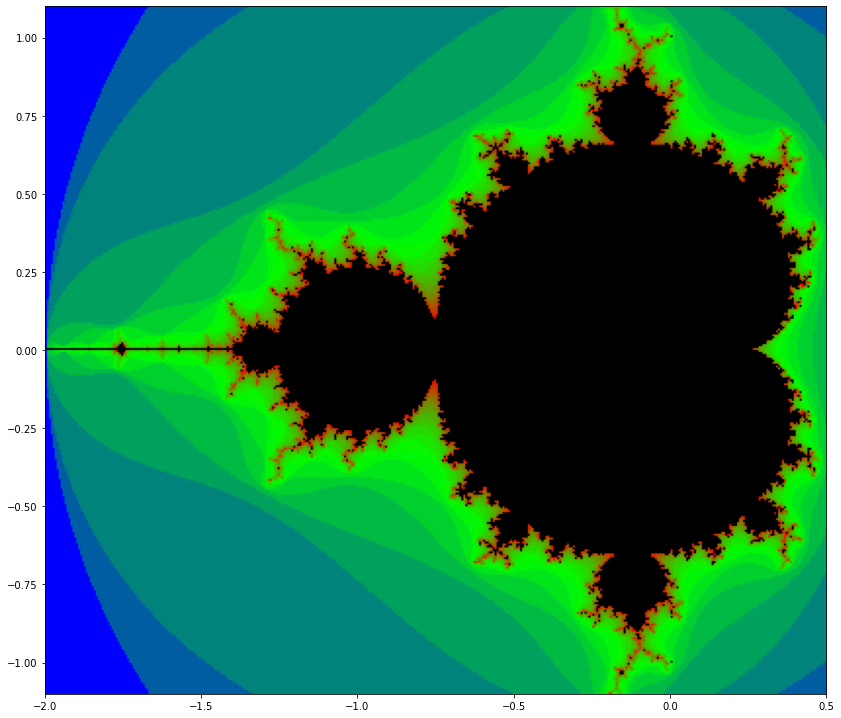

In [5]:
main(rang_max=30, nb_points_ligne=400);

nombre de points en abcisse : 400
nombre de points en ordonnée : 352


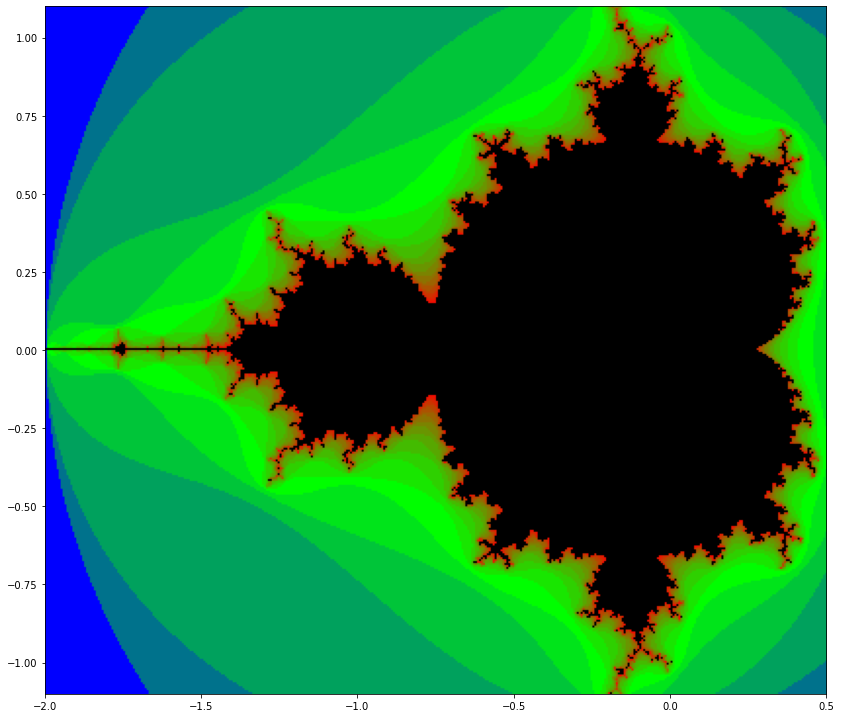

In [6]:
main(rang_max=20, nb_points_ligne=400);

nombre de points en abcisse : 400
nombre de points en ordonnée : 352


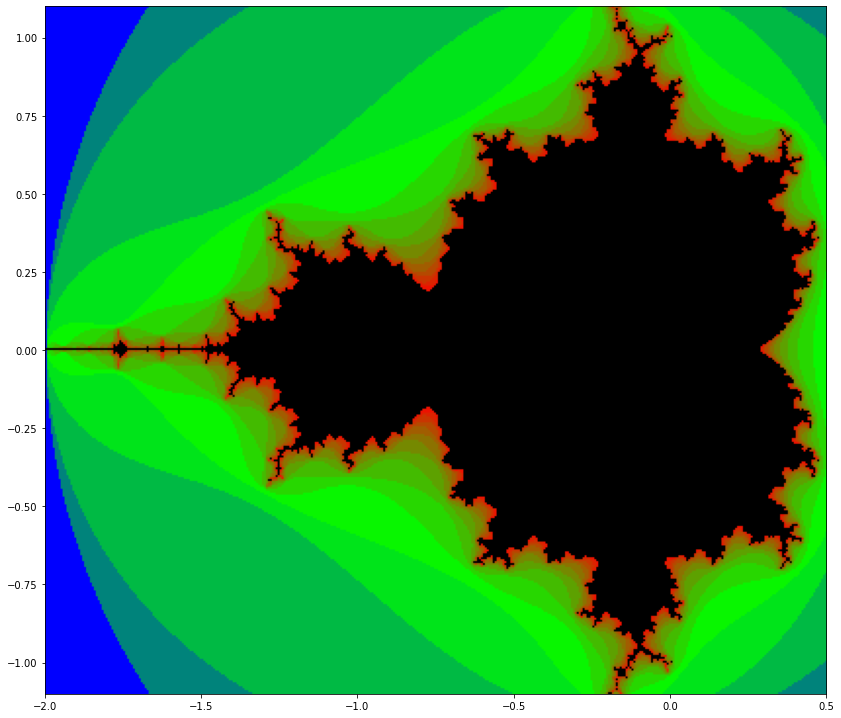

In [7]:
main(rang_max=15, nb_points_ligne=400);

Modifiez les arguments reinf, resup, iminf, imsup pour zoomer sur la frontière de l’ensemble. Contemplez les motifs complexes qu’y s’y forment ; Vous pouvez explorer par vous-même, mais on vous conseille au moins de jeter un œil à la magnifique vallée des hippocampes, par exemple en zoomant sur le point : -0.707+0.352i.

*On peut zoomer sur le point proposé en choisissant xmin, xmax, ymin et ymax autour de ce point, par exemple :*

nombre de points en abcisse : 500
nombre de points en ordonnée : 233


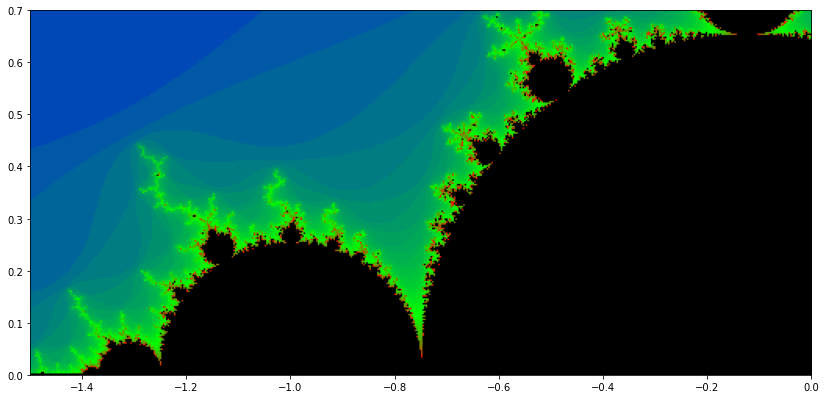

In [8]:
main(xmin=-1.5,xmax=0, ymin=0, ymax=0.7, nb_points_ligne=500);

nombre de points en abcisse : 500
nombre de points en ordonnée : 375


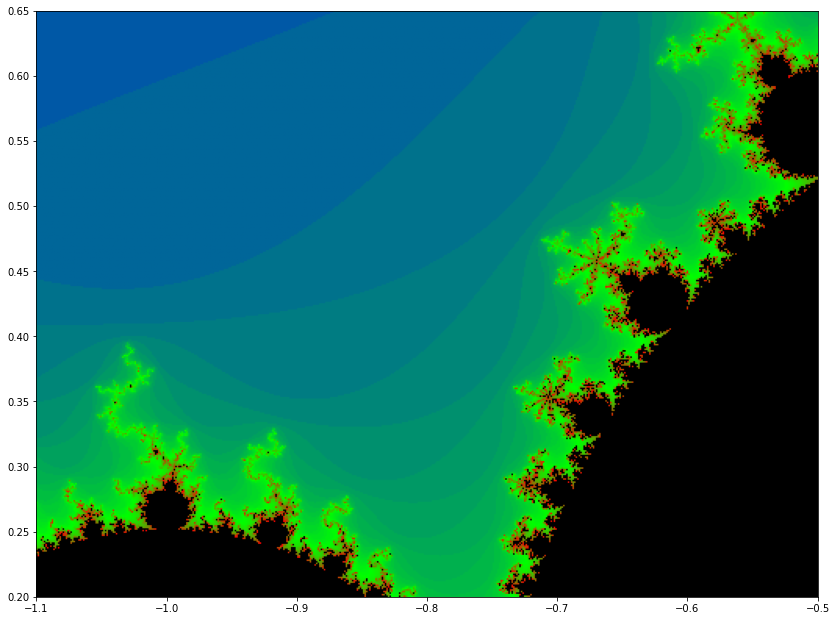

In [9]:
main(xmin=-1.1,xmax=-0.5, ymin=0.2, ymax=0.65, nb_points_ligne=500);

nombre de points en abcisse : 500
nombre de points en ordonnée : 416


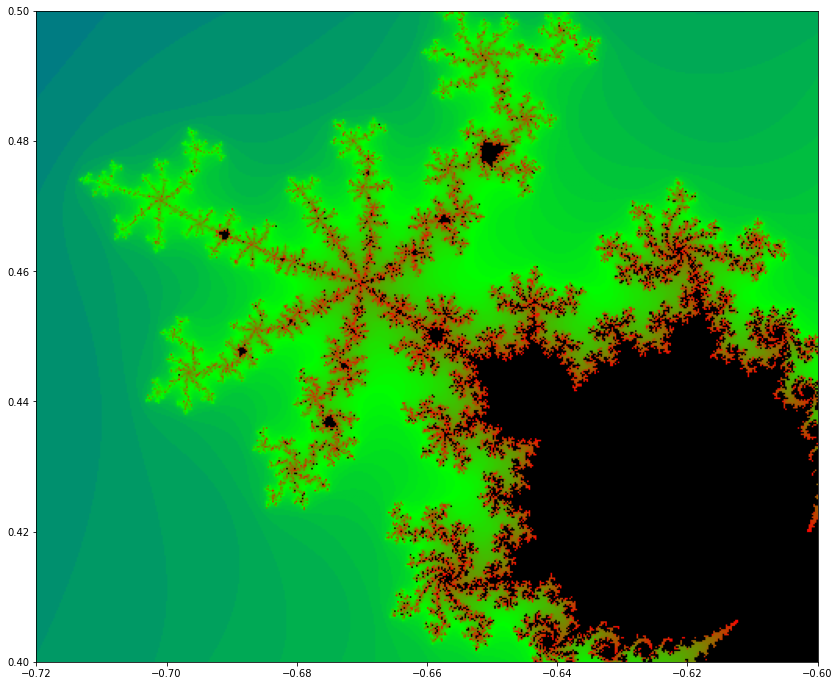

In [10]:
main(xmin=-0.72,xmax=-0.6, ymin=0.4, ymax=0.5, nb_points_ligne=500);

Si la colorisation ne vous convient pas, modifiez mode_de_colorisation (‘log’, ‘noir_et_blanc’ ou ‘linaire’).N’oubliez pas que la colorisation est arbitraire et qu’il existe bien d’autres manières de représenter cet ensemble !

*Il suffit de changer l'argument mode_de_colorisation comme ceci, pour pouvoir voir 3 affichages différents d'une même image :*

nombre de points en abcisse : 400
nombre de points en ordonnée : 333


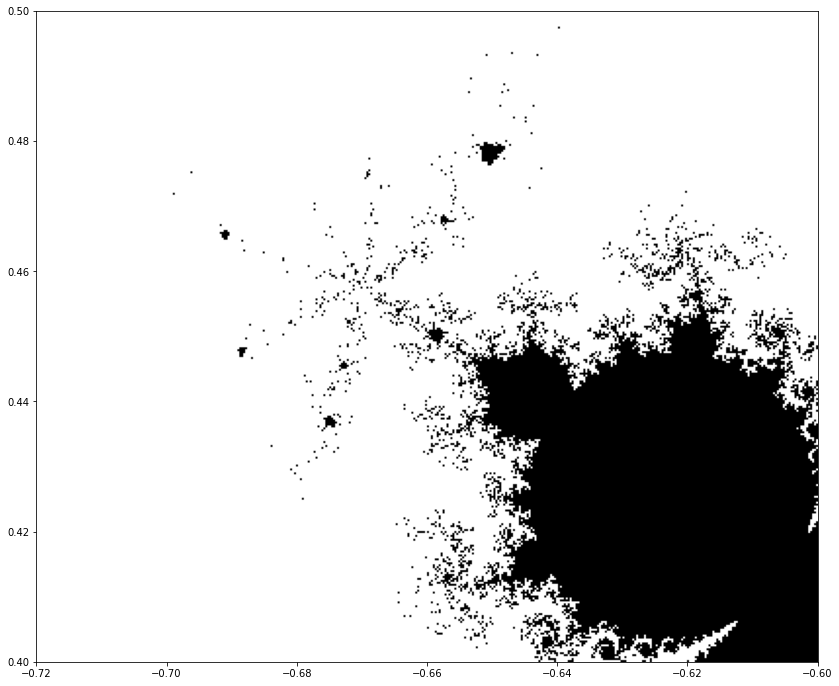

In [11]:
main(xmin=-0.72,xmax=-0.6, ymin=0.4, ymax=0.5, nb_points_ligne=400, mode_de_colorisation='noir_et_blanc');

nombre de points en abcisse : 400
nombre de points en ordonnée : 333


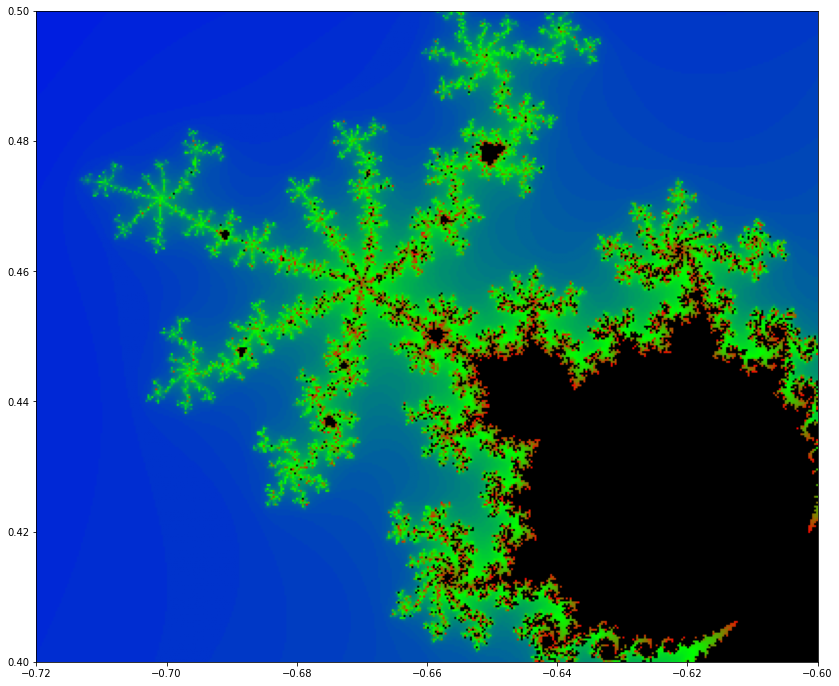

In [12]:
main(xmin=-0.72,xmax=-0.6, ymin=0.4, ymax=0.5, nb_points_ligne=400, mode_de_colorisation='lineaire');

nombre de points en abcisse : 400
nombre de points en ordonnée : 333


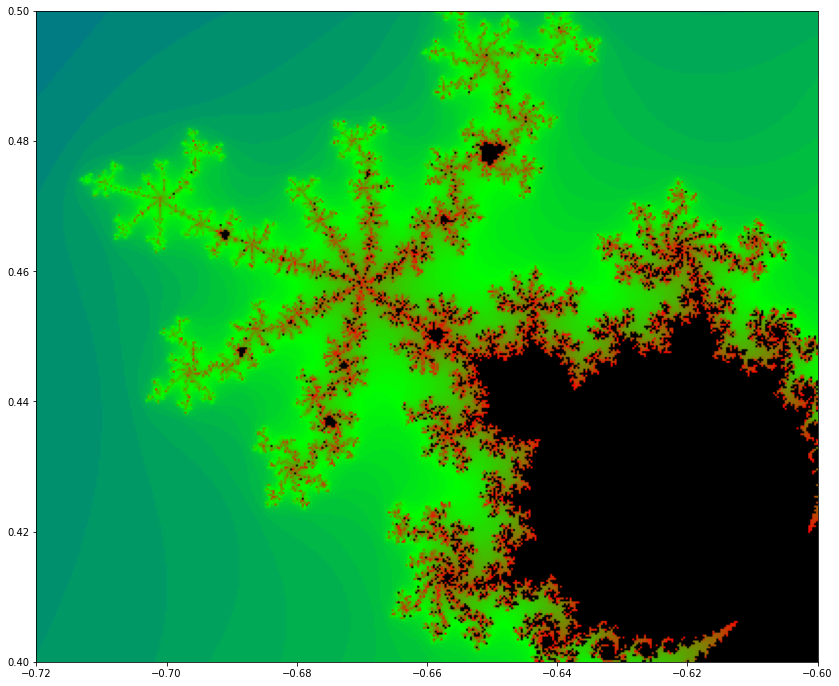

In [13]:
main(xmin=-0.72,xmax=-0.6, ymin=0.4, ymax=0.5, nb_points_ligne=400, mode_de_colorisation='log');

L’ensemble de Mandelbrot est autosimilaire. Cherchez des petits ensembles de Mandelbrot à la frontière. Vous remarquerez qu’ils sont nombreux !

*En cherchant un peu, vous devriez en trouver un peu partout... En voici deux, mais il y en a une infinité !*

nombre de points en abcisse : 500
nombre de points en ordonnée : 285


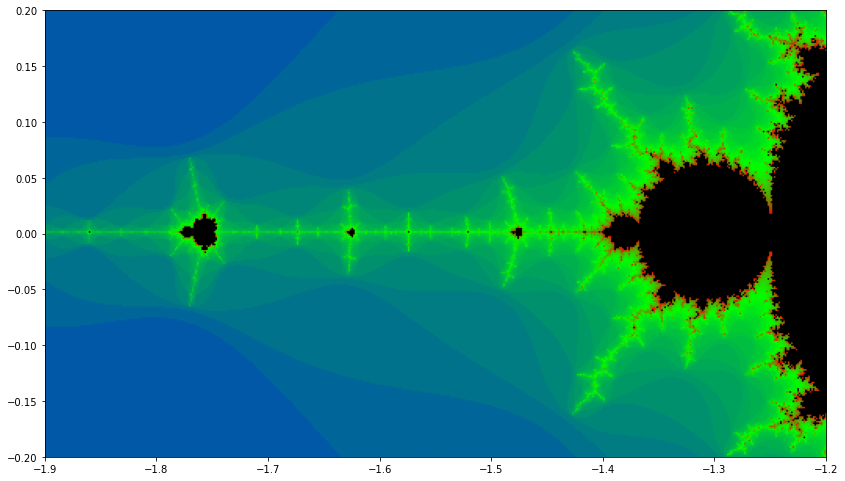

In [14]:
main(xmin=-1.9,xmax=-1.2, ymin=-0.2, ymax=0.2, nb_points_ligne=500);

nombre de points en abcisse : 500
nombre de points en ordonnée : 374


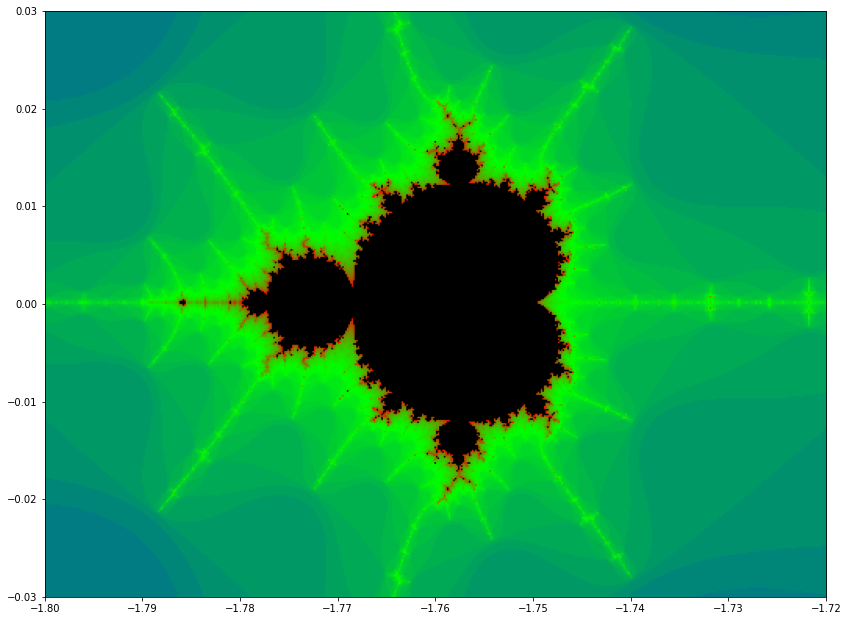

In [15]:
main(xmin=-1.8,xmax=-1.72, ymin=-0.03, ymax=0.03, nb_points_ligne=500);

nombre de points en abcisse : 500
nombre de points en ordonnée : 500


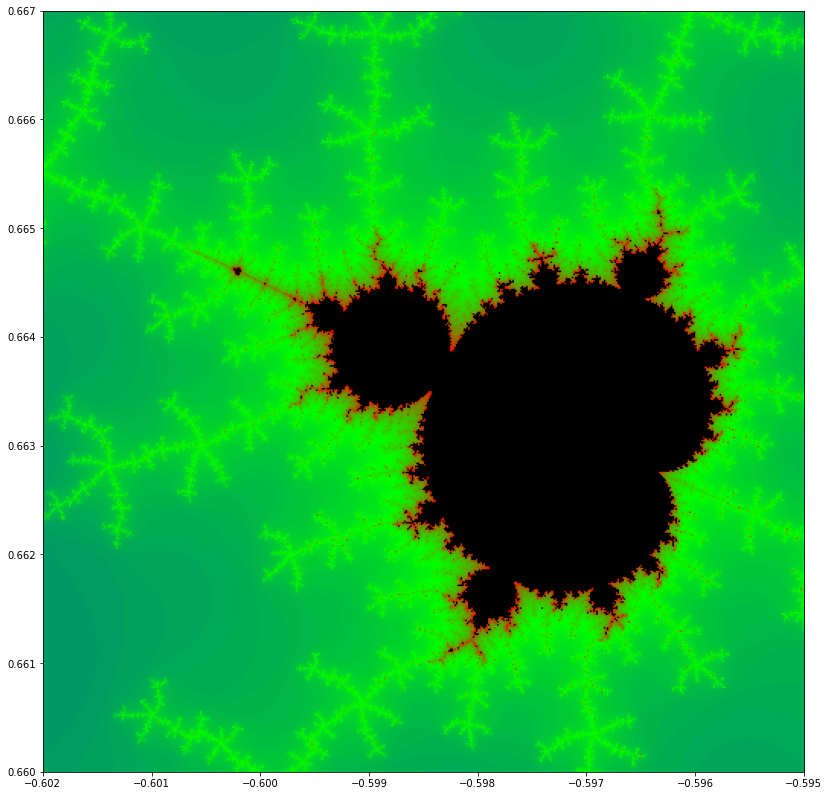

In [16]:
main(xmin=-0.602,xmax=-0.595, ymin=0.66, ymax=0.667, nb_points_ligne=500, rang_max=200);

Nous allons maintenant afficher des ensembles de Julia. Modifiez l’argument “type_ensemble=’julia’” et ajoutez l’argument “complexe”. Souvenez-vous de la définition des ensembles de Julia et observez la diversité des fractales que vous pouvez tracer en modifiant l’argument “argument_julia”.

*On peut afficher une grande variété de fractales de Julia en modifiant l'argument complexe. En voici plusieurs :*

nombre de points en abcisse : 600
nombre de points en ordonnée : 600


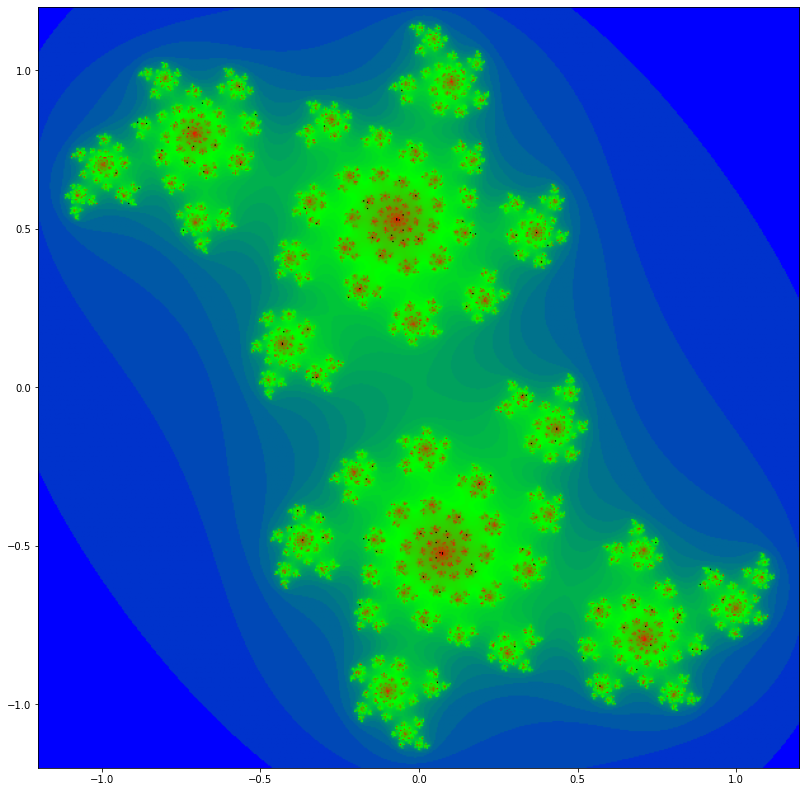

In [17]:
main(xmin=-1.2,xmax=1.2, ymin=-1.2, ymax=1.2, nb_points_ligne=600, type_ensemble='julia');

nombre de points en abcisse : 600
nombre de points en ordonnée : 300


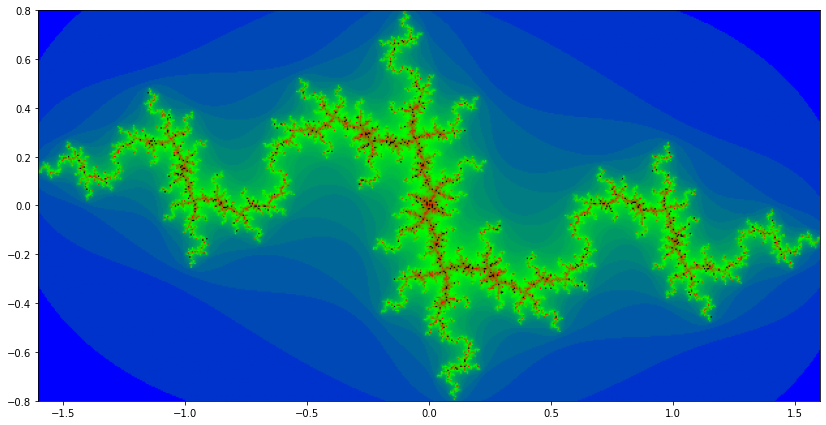

In [18]:
main(xmin=-1.6,xmax=1.6, ymin=-0.8, ymax=0.8, nb_points_ligne=600, type_ensemble='julia', argument_julia=-0.99+0.3j);

nombre de points en abcisse : 600
nombre de points en ordonnée : 471


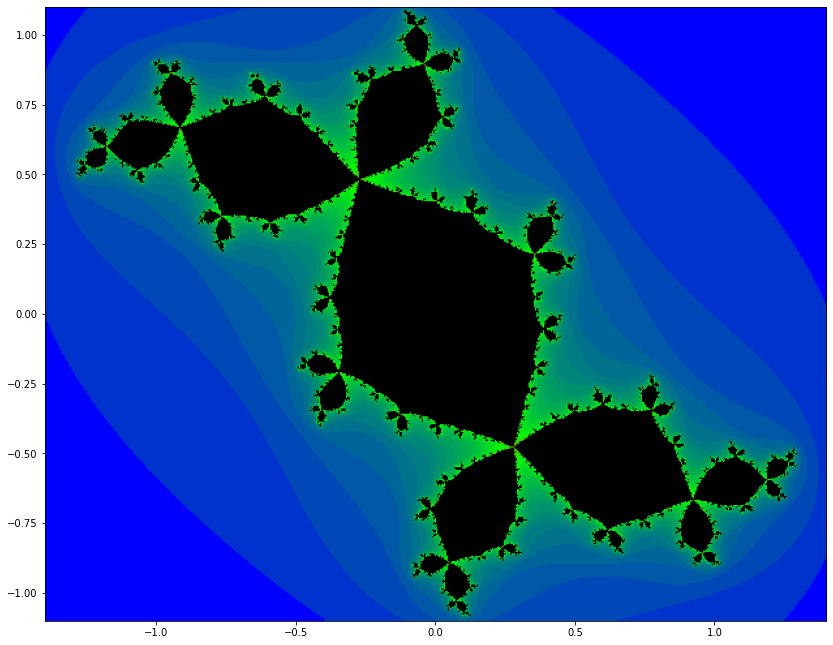

In [19]:
main(xmin=-1.4,xmax=1.4, ymin=-1.1, ymax=1.1, nb_points_ligne=600, type_ensemble='julia', argument_julia=-0.123+0.745j);

Nous avons vu en cours une propriété intéressante : La fractale de Julia associée à C est connexe si et seulement si C appartient à l’ensemble de Mandelbrot. Vérifiez cette propriété sur quelques points en vérifiant : ce point appartient-t-il à l'ensemble de Mandelbrot ? La fractale de Julia qu'il génère est-elle connexe ?

*On peut vérifier cette propriété à partir de n'importe quel point du plan complexe. Nous prendrons 2 exemples. Le point 0.3+0.4j appartient bien à l'ensemble de Mandelbrot (il suffit d'afficher l'ensemble et de le constater) et sa fractale de Julia est bien connexe. On peut alors monter progressivement sa partie imaginaire : Le point 0.3+0.5j appartient à l'ensemble de Mandelbrot mais est bien plus proche de la frontière. Sa fractale de Julia associée est connexe mais on commence à distinguer plusieurs parties prêtes à se séparer. Enfin, le point 0.3+0.6j n'appartient plus à l'ensemble de Mandelbrot et sa fractale de Julia n'est plus connexe. *

nombre de points en abcisse : 500
nombre de points en ordonnée : 500


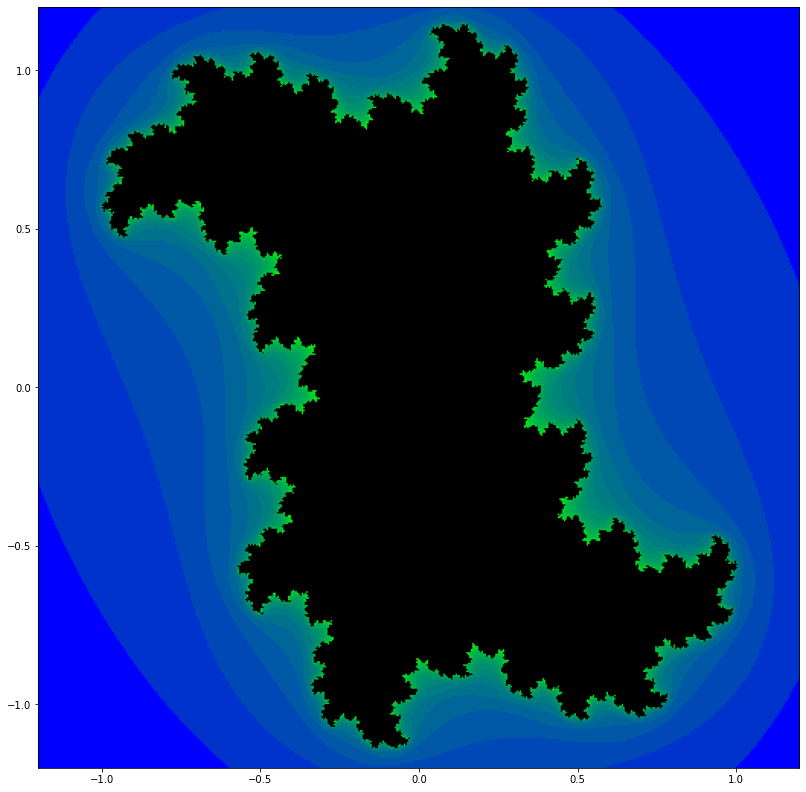

In [20]:
main(xmin=-1.2,xmax=1.2, ymin=-1.2, ymax=1.2, nb_points_ligne=500, type_ensemble='julia', argument_julia=0.3+0.4j);

nombre de points en abcisse : 500
nombre de points en ordonnée : 500


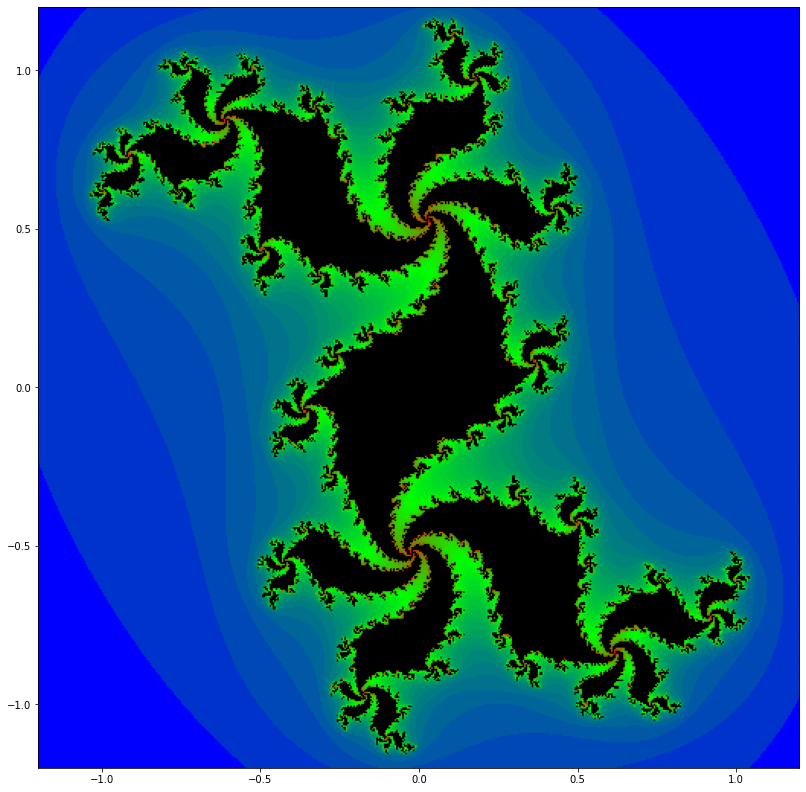

In [21]:
main(xmin=-1.2,xmax=1.2, ymin=-1.2, ymax=1.2, nb_points_ligne=500, type_ensemble='julia', argument_julia=0.3+0.5j);

nombre de points en abcisse : 500
nombre de points en ordonnée : 500


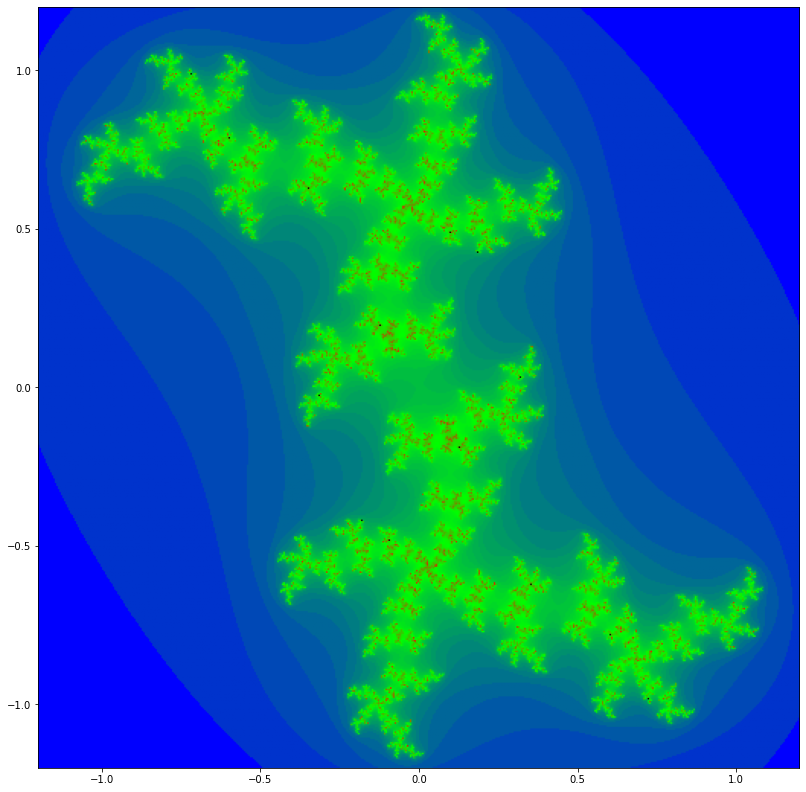

In [22]:
main(xmin=-1.2,xmax=1.2, ymin=-1.2, ymax=1.2, nb_points_ligne=500, type_ensemble='julia', argument_julia=0.3+0.6j);

Voilà c'est la fin de cette initiation à la géométrie fractale. Ce sujet n'est pas toujours facile, **félicitations** pour nous avoir suivi jusqu'au bout ! On espère que ce module vous a plu et vous a donné envie d'en savoir plus. Merci pour votre participation et à bientôt !